In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
trial_data_df = pd.read_csv(clinical_trial_data_to_load)

In [2]:
# Combine the data into a single dataset
treatment_data = pd.merge(trial_data_df, mouse_drug_df, on="Mouse ID")
treatment_data = treatment_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug"]]
# Display the data table for preview
treatment_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_volume_by_drug_time = treatment_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_volume_by_drug_time = tumor_volume_by_drug_time.reset_index()
# Preview DataFrame
tumor_volume_by_drug_time.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem_by_drug_time = treatment_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].apply(stats.sem)
# Convert to DataFrame
tumor_volume_sem_by_drug_time = tumor_volume_sem_by_drug_time.reset_index()
# Preview DataFrame
tumor_volume_sem_by_drug_time.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_long = tumor_volume_by_drug_time.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
tumor_volume_long.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
tumor_volume_sem_long = tumor_volume_sem_by_drug_time.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
tumor_volume_sem_long.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [7]:
analysis_treatments = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
treatment_styles = {
    "Capomulin": "ro:",
    "Infubinol": "b^:",
    "Ketapril": "gs:",
    "Placebo": "kd:"
}
analysis_params = [ (treatment, treatment_styles[treatment]) for treatment in analysis_treatments]


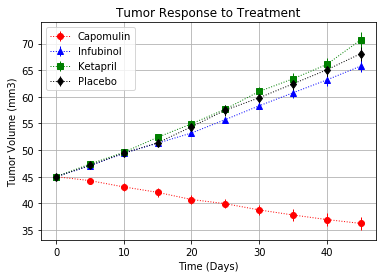

In [8]:
# Generate the Plot (with Error Bars)
# Not entirely sure why, but pandas df.plot seems to be having difficulty with 
# style argument and yerr argument at the same time
# tumor_volume_long[analysis_treatments].plot(style=styles, yerr=tumor_volume_sem_long, grid=True).get_legend().set_title("")

for treatment, treatment_style in analysis_params:
    plt.errorbar(tumor_volume_long.index, \
                 tumor_volume_long[treatment], \
                 fmt=treatment_style, \
                 yerr=tumor_volume_sem_long[treatment], \
                 label=treatment, \
                 linewidth=1)
    plt.grid(True)
    plt.title("Tumor Response to Treatment")
    plt.xlabel("Time (Days)")
    plt.ylabel("Tumor Volume (mm3)")
    

plt.legend()
# Save the Figure
plt.savefig("Tumor_Size_vs_Treatment.png")


In [9]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_site_by_drug_time = treatment_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
metastatic_site_by_drug_time = metastatic_site_by_drug_time.reset_index()
# Preview DataFrame
metastatic_site_by_drug_time.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_sem_by_drug_time = treatment_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].apply(stats.sem)
# Convert to DataFrame
met_site_sem_by_drug_time = met_site_sem_by_drug_time.reset_index()
# Preview DataFrame
met_site_sem_by_drug_time.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
met_site_long = metastatic_site_by_drug_time.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
met_site_long.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [13]:
met_site_sem_long = met_site_sem_by_drug_time.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
met_site_sem_long.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


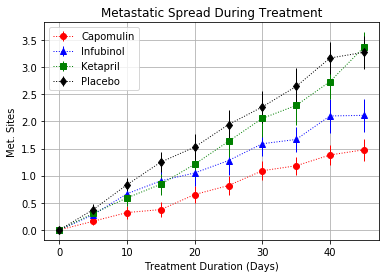

In [14]:
for treatment, treatment_style in analysis_params:
    plt.errorbar(met_site_long.index, \
                 met_site_long[treatment], \
                 fmt=treatment_style, \
                 yerr=met_site_sem_long[treatment], \
                 label=treatment, \
                 linewidth=1)
    plt.grid(True)
    plt.title("Metastatic Spread During Treatment")
    plt.xlabel("Treatment Duration (Days)")
    plt.ylabel("Met. Sites")
    

plt.legend()
# Save the Figure
plt.savefig("Met_Spread_vs_Treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_by_drug_time = treatment_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
mice_count_by_drug_time = mice_count_by_drug_time.reset_index()
# Preview DataFrame
mice_count_by_drug_time.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames
mice_long = mice_count_by_drug_time.pivot(index="Timepoint", columns="Drug", values="Mouse ID")
initial_mice_count = mice_long.iloc[0, :]
# Preview the Data Frame
mice_long.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


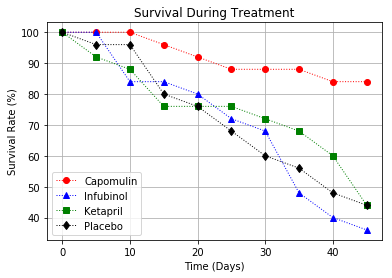

In [17]:
# Generate the Plot (Accounting for percentages)
for treatment, treatment_style in analysis_params:
    plt.errorbar(mice_long.index, \
                 mice_long[treatment] / initial_mice_count[treatment] * 100, \
                 fmt=treatment_style, \
                 label=treatment, \
                 linewidth=1)
    plt.grid(True)
    plt.title("Survival During Treatment")
    plt.xlabel("Time (Days)")
    plt.ylabel("Survival Rate (%)")
    

plt.legend()
# Save the Figure
plt.savefig("Survival_Rate_over_Treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
final_tumor_size_by_drug = tumor_volume_by_drug_time.groupby("Drug")["Tumor Volume (mm3)"].last()
percent_change = (final_tumor_size_by_drug - 45) / 45 * 100
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

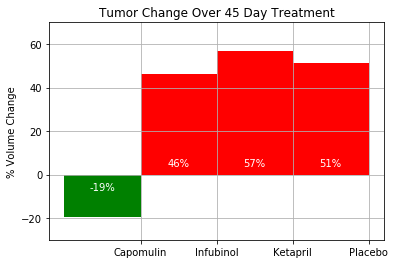

In [19]:
# Store all Relevant Percent Changes into a Tuple
treatment_changes = tuple(percent_change[analysis_treatments].tolist())
treatment_changes
# Splice the data between passing and failing drugs
passing_drugs = percent_change[analysis_treatments][percent_change < 0]
failing_drugs = percent_change[analysis_treatments][percent_change > 0]

passing_colors = ["g"] * len(passing_drugs)
failing_colors = ["r"] * len(failing_drugs)
colors = [*passing_colors, *failing_colors]
# Orient widths. Add labels, tick marks, etc. 
drugs = pd.concat([passing_drugs, failing_drugs])

rects = plt.bar(np.arange(len(treatment_changes)), drugs, width=1, color=colors)
x_label_locations = [label_location + 0.5 for label_location in range(len(treatment_changes))]
plt.xticks(x_label_locations, analysis_treatments)
plt.ylim(-30, 70)
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Volume Change")

# Use functions to label the percentages of changes
ax = plt.gca()

def applyPercentageLabel(ax, rect):
    y = 3 if rect.get_height() > 0 else -8
    x = rect.get_width() / 2 + rect.get_x()
    percentage = int(round(rect.get_height()))
    label = f"{percentage}%"
    ax.text(x, y, label,
            ha='center', va='bottom', color="w")

# Call functions to implement the function calls
for rect in rects:
    applyPercentageLabel(ax, rect)

# Save the Figure
plt.savefig("Tumor_Change_Over_45_Day_Treatment.png")

# Show the Figure
plt.show()